### 1. Import Libraries (numpy,pandas,seaborn,matplotlib)

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# styling
sns.set(style="whitegrid")
%matplotlib inline


df = pd.read_csv(r"C:\Users\asus\Documents\STUDY YEAR\DEGREE\SEM 6\DATA SCIENCE\ASSIGNMENT 3 (GROUP)\Dataset\crime_district.csv")
df.head()

,state,district,category,type,date,crimes
0,Malaysia,All,assault,all,1/1/2016,22327
1,Malaysia,All,assault,all,1/1/2017,21366
2,Malaysia,All,assault,all,1/1/2018,16902
3,Malaysia,All,assault,all,1/1/2019,16489
4,Malaysia,All,assault,all,1/1/2020,13279


### 2. Understand The Structure of Dataset (to help identify any missing values,incorrect types,formatting issues)
- Size
- Datatypes
- null values

In [ ]:
print("Dataset infromation:\n", df.info()) 

print("\nDataset shape:\n", df.shape)

print("\nMissing values in dataset:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19152 entries, 0 to 19151
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   state     19152 non-null  object
 1   district  19152 non-null  object
 2   category  19152 non-null  object
 3   type      19152 non-null  object
 4   date      19152 non-null  object
 5   crimes    19152 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 897.9+ KB
Dataset infromation:
 None

Dataset shape:
 (19152, 6)

Missing values in dataset:
 state       0
district    0
category    0
type        0
date        0
crimes      0
dtype: int64


### 3. Data Preprocessing
- Convert date to datetime
- Create year column
- Filter "assault" category (Because our research want to focus on assault cases)

In [17]:
# date to datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

# extract year from the date column
df['year'] = df['date'].dt.year

# filter the row that only have "assault" crime
df_assault = df[df['category'].str.lower() == 'assault']

# print the assault data only
df_assault.head()

,state,district,category,type,date,crimes,year
0,Malaysia,All,assault,all,2016-01-01,22327,2016
1,Malaysia,All,assault,all,2017-01-01,21366,2017
2,Malaysia,All,assault,all,2018-01-01,16902,2018
3,Malaysia,All,assault,all,2019-01-01,16489,2019
4,Malaysia,All,assault,all,2020-01-01,13279,2020


### Research Question
“What are the trends and patterns of assault-related crimes across all states in Malaysia between 2016 and 2023?”

### Research Objectives
1. To analyze the yearly trend of assault-related crimes in Malaysia from 2016 to 2023.
2. To identify the states in Malaysia with the highest and lowest number of assault-related crime cases.
3. To examine the distribution of assault-related crimes across Malaysian states for each year using visual analytics.


### 4. Descriptive Analytics
- to summarize & explore insights from the assault data using statistics
# A. Yearly Total Assault Crimes 


In [22]:
# count total assault crimes per year
yearly_trend = df_assault.groupby('year')['crimes'].sum().reset_index()

# show the sum of each year assault crime
yearly_trend

,year,crimes
0,2016,133962
1,2017,128196
2,2018,101412
3,2019,98934
4,2020,79674
5,2021,68970
6,2022,62088
7,2023,62718


# B. State-wise Total Assault Crimes

In [25]:
# Count total asasult crimes per state
state_totals = df_assault.groupby('state')['crimes'].sum().sort_values(ascending=False).reset_index()

state_totals

,state,crimes
0,Malaysia,245318
1,Selangor,143432
2,W.P. Kuala Lumpur,76884
3,Johor,54844
4,Perak,30804
5,Pulau Pinang,30408
6,Kedah,28728
7,Sarawak,24152
8,Negeri Sembilan,21332
9,Sabah,18296


### 5. Data Visualization
- Plot chart to visualize trends and do comparisons

# A. Line chart - Yearly Trend

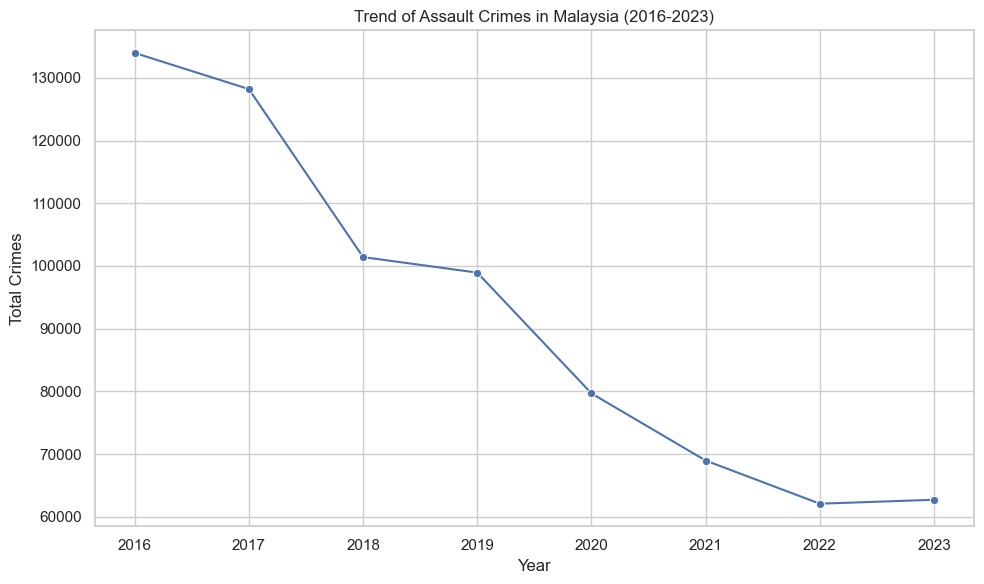

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_trend, x='year', y='crimes', marker='o')
plt.title("Trend of Assault Crimes in Malaysia (2016-2023)")
plt.xlabel("Year")
plt.ylabel("Total Crimes")
#plt.xticks(yearly_trend['year'])
#plt.tight_layout()
plt.show()

# B. Bar Chart - States

C:\Users\asus\AppData\Local\Temp\ipykernel_27124\3321418013.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_totals, x='state', y='crimes', palette='viridis')


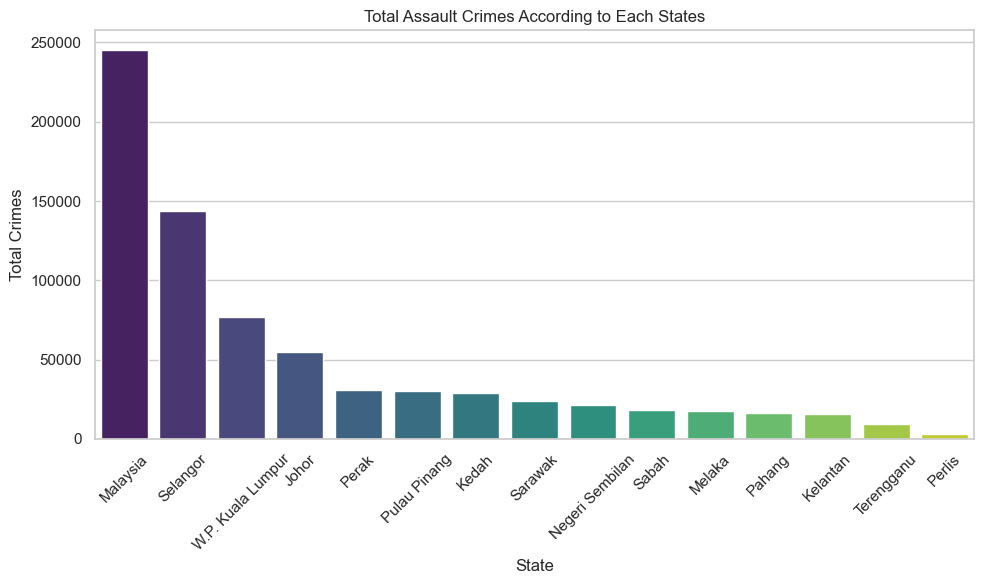

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(data=state_totals, x='state', y='crimes', palette='viridis')
plt.title("Total Assault Crimes According to Each States")
plt.xlabel("State")
plt.ylabel("Total Crimes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# C. Heatmap - Crimes by State & Year

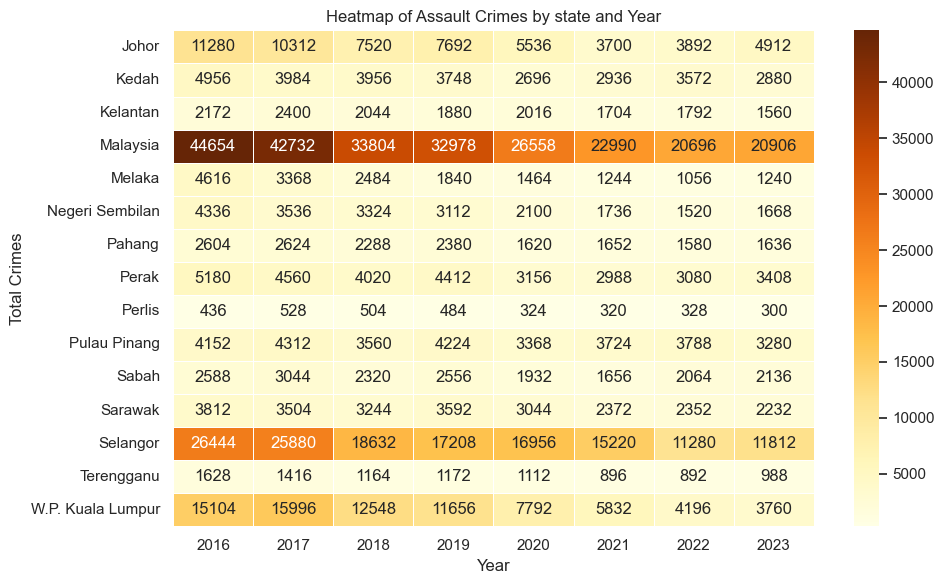

In [37]:
heatmap_data = df_assault.pivot_table(values='crimes', index='state', columns='year', aggfunc='sum', fill_value=0)

plt.figure(figsize=(10,6))
sns.heatmap(data=heatmap_data, cmap='YlOrBr', annot=True, fmt='.0f', linewidths=0.5)
plt.title("Heatmap of Assault Crimes by state and Year")
plt.xlabel("Year")
plt.ylabel("Total Crimes")
plt.tight_layout()
plt.show()

### 6. Discussion & Conclusion (LUQMAN)

### Discussion
- The line chart shows a clear downward trend in assault-related crimes from 2016 to 2020, likely due to enforcement or policy changes. Slight fluctuation is seen after 2021.
- States like [e.g., Selangor, Kuala Lumpur] recorded the highest total assault crimes.
- The heatmap shows consistent hotspots of crimes in urban regions, with relatively fewer cases in smaller or rural states.

### Conclusion
This descriptive analysis highlights important patterns in assault-related crimes across Malaysia. Policymakers can use this data to allocate resources, reinforce law enforcement in hotspot areas, and evaluate the effectiveness of crime prevention strategies.
